In [32]:
from model.MatFileStorageParser import FileModel

In [33]:
file = "use_case_1_2_pools.mat"

bs, nf, nm = FileModel.load_file_basic(file)

In [34]:
bs

array([[59.77221046, 32.98537944, 40.        ],
       [11.22877038, 30.75747819, 40.        ],
       [35.47109623, 38.76424705, 40.        ],
       [41.4060429 , 16.21839423, 40.        ],
       [10.12300401, 39.56292084,  0.1       ],
       [ 2.        , 27.78909366,  0.1       ],
       [56.14274585, 39.22318859,  0.1       ],
       [69.50889474, 39.85243194,  0.1       ],
       [72.4792569 , 30.15115258,  0.1       ],
       [51.5545647 , 15.14990663,  0.1       ],
       [32.95463089, 29.38573977,  0.1       ],
       [ 9.18900065, 22.06022915,  0.1       ],
       [50.66337746,  7.44246264,  0.1       ],
       [33.35079778,  2.        ,  0.1       ],
       [52.00805917, 30.35019544,  0.1       ],
       [ 5.22945301, 33.72943206,  0.1       ],
       [30.87521621, 59.03593972,  0.1       ]])

In [35]:
print(nf)
print(nm)

13
4


In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

In [37]:

def generar_mapa_calor(base_stations, grid_size=100, bandwidth=1.0, border=3):
    """
    base_stations: array de shape (N, 2) con coordenadas x, y de estaciones base
    grid_size: resolución del mapa de calor
    bandwidth: suavizado del KDE
    """
    x = base_stations[:, 0]
    y = base_stations[:, 1]
    
    # Crear el KDE
    kde = gaussian_kde(np.vstack([x, y]), bw_method=bandwidth)
    
    # Borders 
    
    x_min = x.min() - x.min() * border
    x_max = x.max() + x.max() * border
    y_min = y.min() - y.min() * border
    y_max = y.max() + y.max() * border
    
    # Crear la malla
    xi, yi = np.meshgrid(
        np.linspace(x.min() - border, x.max() + border, grid_size),
        np.linspace(y.min() - border, y.max() + border, grid_size)
    )
    coords = np.vstack([xi.ravel(), yi.ravel()])
    zi = kde(coords).reshape(xi.shape)
    
    # Normalizar para usar como distribución de probabilidad
    zi_norm = zi / zi.sum()
    
    return xi, yi, zi_norm


In [38]:
def muestrear_usuarios(xi, yi, zi_norm, num_usuarios=100):
    """
    xi, yi: malla de coordenadas del mapa de calor
    zi_norm: densidad normalizada
    """
    flat_probs = zi_norm.ravel()
    flat_probs /= flat_probs.sum()  # asegurar suma 1
    
    indices = np.random.choice(len(flat_probs), size=num_usuarios, p=flat_probs)
    
    x_coords = xi.ravel()[indices]
    y_coords = yi.ravel()[indices]
    
    return np.vstack((x_coords, y_coords)).T


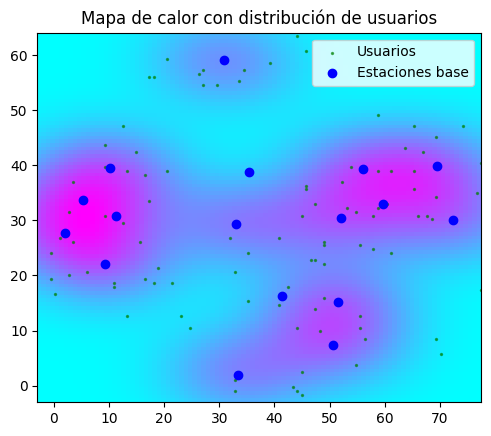

In [40]:
# Ejemplo de uso
xi, yi, zi_norm = generar_mapa_calor(base_stations=bs[nm:], bandwidth=0.4, border=5)

usuarios = muestrear_usuarios(xi, yi, zi_norm, 100)

plt.imshow(zi_norm, origin='lower', extent=(xi.min(), xi.max(), yi.min(), yi.max()), cmap='cool')
plt.scatter(usuarios[:, 0], usuarios[:, 1], s=2, color='green', alpha=0.6, label="Usuarios")
plt.scatter(bs[:, 0], bs[:, 1], color='blue', label="Estaciones base")
plt.legend()
plt.title("Mapa de calor con distribución de usuarios")
plt.show()
